In [226]:
import json
import seaborn as sns
import pandas as  pd
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pickle

In [227]:
with open('/Users/charumehndiratta/Downloads/business_df.pickle', 'rb') as handle:
    business_df = pickle.load(handle)

In [228]:
with open('/Users/charumehndiratta/Downloads/review_df.pickle', 'rb') as handle:
    reviews_df = pickle.load(handle)

In [229]:
fin_ans_moe = business_df[business_df['name'] == "Moe's Southwest Grill"]
fin_ans_burger = business_df[business_df['name'] == "Burger King"]
fin_ans_taco = business_df[business_df['name'] == "Taco Bell"]

In [230]:
new_ans_moe = pd.merge(reviews_df, fin_ans_moe, on='business_id', how='inner')
new_ans_burger = pd.merge(reviews_df, fin_ans_burger, on='business_id', how='inner')
new_ans_taco = pd.merge(reviews_df, fin_ans_taco, on='business_id', how='inner')

In [231]:
def func1(str):
    return pd.to_datetime(str).year

b_df_moe = new_ans_moe['date'].apply(lambda row: func1(row))
b_df_burger = new_ans_burger['date'].apply(lambda row: func1(row))
b_df_taco = new_ans_taco['date'].apply(lambda row: func1(row))

In [232]:
new_ans_moe['year'] = b_df_moe
new_ans_burger['year'] = b_df_burger
new_ans_taco['year'] = b_df_taco

In [233]:
final_new_ans_moe = new_ans_moe[(new_ans_moe['year'] >= 2007 )& (new_ans_moe['year'] <= 2009) ]
final_new_ans_burger = new_ans_burger[(new_ans_burger['year'] >= 2007 )& (new_ans_burger['year'] <= 2009) ]
final_new_ans_taco = new_ans_taco[(new_ans_taco['year'] >= 2007 )& (new_ans_taco['year'] <= 2009) ]

In [234]:
total_stars_surrounding_rest_moe = final_new_ans_moe[['review_count', 'year']]
total_stars_surrounding_rest_burger = final_new_ans_burger[['review_count', 'year']]
total_stars_surrounding_rest_taco = final_new_ans_taco[['review_count', 'year']]

In [235]:
review_count_moe = total_stars_surrounding_rest_moe['review_count'].tolist()
year = total_stars_surrounding_rest_moe['year'].tolist()

final_result_moe = {}
for i in range(len(review_count_moe)):
    if year[i] in final_result_moe:
        final_result_moe[year[i]]['review_count'] = final_result_moe[year[i]]['review_count'] + review_count_moe[i]
        final_result_moe[year[i]]['count'] = final_result_moe[year[i]]['count'] + 1
    else:
        final_result_moe[year[i]] = {'review_count' : review_count[i], 'count':1}
        

In [236]:
review_count_burger = total_stars_surrounding_rest_burger['review_count'].tolist()
year = total_stars_surrounding_rest_burger['year'].tolist() 

final_result_burger = {}
for i in range(len(review_count_burger)):
    if year[i] in final_result_burger:
        final_result_burger[year[i]]['review_count'] = final_result_burger[year[i]]['review_count'] + review_count_burger[i]
        final_result_burger[year[i]]['count'] = final_result_burger[year[i]]['count'] + 1
    else:
        final_result_burger[year[i]] = {'review_count' : review_count_burger[i], 'count':1}


In [237]:
review_count_taco = total_stars_surrounding_rest_taco['review_count'].tolist()
year = total_stars_surrounding_rest_taco['year'].tolist()   

final_result_taco = {}
for i in range(len(review_count_taco)):
    if year[i] in final_result_taco:
        final_result_taco[year[i]]['review_count'] = final_result_taco[year[i]]['review_count'] + review_count_taco[i]
        final_result_taco[year[i]]['count'] = final_result_taco[year[i]]['count'] + 1
    else:
        final_result_taco[year[i]] = {'review_count' : review_count_taco[i], 'count':1}


In [245]:
review_count_kitchen = total_stars_surrounding_rest_kitchen['review_count'].tolist()
year = total_stars_surrounding_rest_kitchen['year'].tolist()

final_result_kitchen = {}
for i in range(len(review_count_kitchen)):
    if year[i] in final_result_kitchen:
        final_result_kitchen[year[i]]['review_count'] = final_result_kitchen[year[i]]['review_count'] + review_count_kitchen[i]
        final_result_kitchen[year[i]]['count'] = final_result_kitchen[year[i]]['count'] + 1
    else:
        final_result_kitchen[year[i]] = {'review_count' : review_count_kitchen[i], 'count':1}
        

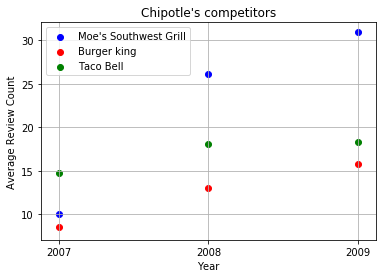

In [250]:
# final_result
import matplotlib.pyplot as plt


x_label_moe = list(final_result_moe.keys())
vals_moe = list(final_result_moe.values())

y_label_moe = []
for val in vals_moe:  
    y_label_moe.append(val['review_count']/val['count'])
plt.scatter(
    x_label_moe,
    y_label_moe,
    color='b', label="Moe's Southwest Grill")

x_label_burger = list(final_result_burger.keys())
vals_burger = list(final_result_burger.values())

y_label_burger = []
for val in vals_burger:  
    y_label_burger.append(val['review_count']/val['count'])
plt.scatter(
    x_label_burger,
    y_label_burger,
    color='r', label="Burger king")

x_label_taco = list(final_result_taco.keys())
vals_taco = list(final_result_taco.values())

y_label_taco = []
for val in vals_taco:  
    y_label_taco.append(val['review_count']/val['count'])
plt.scatter(
    x_label_taco,
    y_label_taco,
    color='g', label="Taco Bell")

plt.xlabel("Year")
plt.ylabel("Average Review Count")
plt.grid()
plt.legend()
plt.xticks(x_label_taco)
plt.title("Chipotle's competitors")
plt.savefig('chipotle_competitor.png')